In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble  import RandomForestRegressor
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

import multiprocessing
import xgboost as xgb

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import multiprocessing
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [31]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)


In [32]:
path = "/Users/rafa/Desktop/Project/Data/FM 2023.csv"
df_original = pd.read_csv(path)

In [33]:
df = df_original.copy()

In [34]:
#count = (df["Values"] == 347975206).sum()
#df.drop(df[df["Values"] == 347975206].index, inplace=True)

In [35]:
#overcharged_players = df.loc[df["Values"] == 347975206]

In [36]:
count = (df["Values"] >= 50000000).sum()
df.drop(df[df["Values"] >= 500000006].index, inplace=True)


In [37]:
df.drop(df[df["Values"] > 50000000].index, inplace=True)


In [38]:
count = (df["Values"] <= 50000).sum()
count

164

In [39]:
df.drop(df[df["Values"] <= 50000].index, inplace=True)


In [40]:
df_original.iloc[2,:]

Name                                   Robert Lewandowski
Position                                                S
Age                                                    33
ca                                                    186
pa                                                    190
Nationality                                        Poland
Club                                            Barcelona
Corners                                                 3
Crossing                                                8
Dribbling                                              13
Finishing                                              19
First Touch                                            18
Free Kick Taking                                       15
Heading                                                17
Long Shots                                             12
Long Throws                                             3
Marking                                                 7
Passing       

In [41]:
df.columns

Index(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality', 'Club', 'Corners',
       'Crossing', 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking',
       'Heading', 'Long Shots', 'Long Throws', 'Marking', 'Passing',
       'Penalty Taking', 'Tackling', 'Technique', 'Aggressiion',
       'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Vision',
       'Decision', 'Determination', 'Flair', 'Leadership', 'Off The Ball',
       'Position.1', 'Teamwork', 'Work Rate', 'Acceleration', 'Agility',
       'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 'Stamina',
       'Strength', 'Stability', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 

In [42]:
df.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

In [43]:
df = pd.DataFrame(df)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df['Best_Position'] = df.apply(find_column_name, axis=1)


Cleaning

In [44]:
amr_df = df[(df["Best_Position"] == "AMC")]
amr_df = amr_df.reset_index(drop=True)
amr_df

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Paulo Dybala,AM/S RC,28,160,177,Associazione Sportiva Roma,16,15,18,15,18,17,13,17,4,4,17,16,4,19,9,16,10,12,11,17,14,13,17,11,14,4,14,12,14,18,18,7,10,12,12,12,13,5,11,16,13,1,2,3,3,3,3,3,2,3,1,3,14,14,12,9,9,11,13,15,1,1,1,1,1,1,1,1,1,1,12,20,15,20,177,79,20,10,20000000,14044150,AMC
1,Marco Reus,AM RLC,33,159,170,Borussia Dortmund,15,13,13,16,16,16,6,15,7,6,15,15,9,16,15,15,12,16,15,14,15,18,13,13,18,10,14,15,14,12,14,8,12,13,13,9,17,4,17,19,16,1,2,1,2,2,1,2,1,3,3,2,9,16,9,18,17,17,10,10,1,1,1,1,1,1,1,13,8,10,20,20,15,15,180,71,14,20,33067483,91013383,AMC
2,Rafa,AM RLC,29,155,158,SL Benfica,11,11,16,11,15,11,5,12,5,6,14,12,9,15,13,13,11,10,11,15,12,13,19,10,17,7,9,11,18,18,15,5,16,17,13,6,12,6,15,7,10,1,3,2,2,2,1,2,2,2,1,3,8,7,10,14,12,14,9,14,1,1,1,1,1,1,1,14,12,12,20,20,18,14,172,62,11,20,29699999,55063493,AMC
3,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
4,Dejan Kulusevski,M/AM RC,22,153,171,Juventus,11,14,16,13,15,9,7,11,4,4,17,11,7,16,7,15,8,13,12,16,16,15,15,6,14,6,14,14,13,14,17,12,14,14,16,15,14,11,14,6,15,3,1,3,2,3,2,2,3,1,3,1,16,14,8,12,15,14,13,10,1,1,1,1,1,9,1,12,14,18,14,20,20,14,186,79,20,14,35000000,43295814,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Archie Stevens,AM RLC,16,68,-8,Rangers,6,6,8,7,14,4,7,6,7,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,11,9,5,9,3,1,1,2,2,1,2,1,3,3,3,16,13,5,11,10,11,11,18,1,1,1,1,1,1,1,11,14,13,18,20,17,12,188,0,10,20,8871048,2000183425,AMC
709,Adam Berry,AM LC,16,66,-75,Manchester UFC,10,8,11,9,12,11,1,10,1,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,6,16,6,15,2,1,3,3,2,2,2,1,1,3,1,12,9,8,11,10,10,11,10,1,1,1,1,1,1,1,14,15,10,16,20,12,1,182,0,13,20,9678350,2000190307,AMC
710,Nevio Di Giusto,AM C,17,65,-75,FC Zürich,5,2,6,7,13,3,7,7,1,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,7,7,5,13,3,4,1,2,3,1,4,1,3,4,1,8,11,4,10,9,12,9,10,1,1,1,1,1,1,1,1,15,1,1,20,1,15,162,0,15,20,2977776,2000116928,AMC
711,Logan Briggs,M/AM RLC,17,60,-75,Leicester City,3,6,9,4,12,4,4,4,1,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,7,8,12,15,1,1,1,3,1,2,3,2,1,1,2,19,12,6,13,11,11,12,19,1,1,1,1,1,1,1,1,18,1,15,20,15,1,174,0,8,20,8861769,2000177580,AMC


Keep Attibutes


In [45]:
AMR_detailed_features = ['Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
        'diversity']

In [46]:
amr_df


,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Paulo Dybala,AM/S RC,28,160,177,Associazione Sportiva Roma,16,15,18,15,18,17,13,17,4,4,17,16,4,19,9,16,10,12,11,17,14,13,17,11,14,4,14,12,14,18,18,7,10,12,12,12,13,5,11,16,13,1,2,3,3,3,3,3,2,3,1,3,14,14,12,9,9,11,13,15,1,1,1,1,1,1,1,1,1,1,12,20,15,20,177,79,20,10,20000000,14044150,AMC
1,Marco Reus,AM RLC,33,159,170,Borussia Dortmund,15,13,13,16,16,16,6,15,7,6,15,15,9,16,15,15,12,16,15,14,15,18,13,13,18,10,14,15,14,12,14,8,12,13,13,9,17,4,17,19,16,1,2,1,2,2,1,2,1,3,3,2,9,16,9,18,17,17,10,10,1,1,1,1,1,1,1,13,8,10,20,20,15,15,180,71,14,20,33067483,91013383,AMC
2,Rafa,AM RLC,29,155,158,SL Benfica,11,11,16,11,15,11,5,12,5,6,14,12,9,15,13,13,11,10,11,15,12,13,19,10,17,7,9,11,18,18,15,5,16,17,13,6,12,6,15,7,10,1,3,2,2,2,1,2,2,2,1,3,8,7,10,14,12,14,9,14,1,1,1,1,1,1,1,14,12,12,20,20,18,14,172,62,11,20,29699999,55063493,AMC
3,Pablo Sarabia,AM RLC,30,154,156,Paris Saint-Germain,15,15,15,15,17,15,7,13,5,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,9,15,10,15,2,1,1,1,2,1,2,2,3,4,1,7,12,10,10,12,14,14,10,1,1,1,1,10,1,1,15,13,15,17,20,19,1,174,70,20,10,36552285,67045428,AMC
4,Dejan Kulusevski,M/AM RC,22,153,171,Juventus,11,14,16,13,15,9,7,11,4,4,17,11,7,16,7,15,8,13,12,16,16,15,15,6,14,6,14,14,13,14,17,12,14,14,16,15,14,11,14,6,15,3,1,3,2,3,2,2,3,1,3,1,16,14,8,12,15,14,13,10,1,1,1,1,1,9,1,12,14,18,14,20,20,14,186,79,20,14,35000000,43295814,AMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Archie Stevens,AM RLC,16,68,-8,Rangers,6,6,8,7,14,4,7,6,7,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,11,9,5,9,3,1,1,2,2,1,2,1,3,3,3,16,13,5,11,10,11,11,18,1,1,1,1,1,1,1,11,14,13,18,20,17,12,188,0,10,20,8871048,2000183425,AMC
709,Adam Berry,AM LC,16,66,-75,Manchester UFC,10,8,11,9,12,11,1,10,1,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,6,16,6,15,2,1,3,3,2,2,2,1,1,3,1,12,9,8,11,10,10,11,10,1,1,1,1,1,1,1,14,15,10,16,20,12,1,182,0,13,20,9678350,2000190307,AMC
710,Nevio Di Giusto,AM C,17,65,-75,FC Zürich,5,2,6,7,13,3,7,7,1,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,7,7,5,13,3,4,1,2,3,1,4,1,3,4,1,8,11,4,10,9,12,9,10,1,1,1,1,1,1,1,1,15,1,1,20,1,15,162,0,15,20,2977776,2000116928,AMC
711,Logan Briggs,M/AM RLC,17,60,-75,Leicester City,3,6,9,4,12,4,4,4,1,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,7,8,12,15,1,1,1,3,1,2,3,2,1,1,2,19,12,6,13,11,11,12,19,1,1,1,1,1,1,1,1,18,1,15,20,15,1,174,0,8,20,8861769,2000177580,AMC


In [47]:
amr_df2 = amr_df[['Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability',
       'diversity', ]].applymap(lambda x: np.nan if x < 0 else x).dropna()


In [48]:
amr_df2

,Age,Values,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,diversity
0,28,20000000,16,15,18,15,18,17,13,17,4,17,16,4,19,9,16,10,12,11,17,14,13,17,11,14,4,14,12,14,18,18,7,10,12,12,12,13,13
1,33,33067483,15,13,13,16,16,16,6,15,6,15,15,9,16,15,15,12,16,15,14,15,18,13,13,18,10,14,15,14,12,14,8,12,13,13,9,17,16
2,29,29699999,11,11,16,11,15,11,5,12,6,14,12,9,15,13,13,11,10,11,15,12,13,19,10,17,7,9,11,18,18,15,5,16,17,13,6,12,10
3,30,36552285,15,15,15,15,17,15,7,13,7,15,13,6,17,10,13,11,13,13,16,14,9,15,8,15,8,15,14,15,16,15,6,12,14,13,10,14,15
4,22,35000000,11,14,16,13,15,9,7,11,4,17,11,7,16,7,15,8,13,12,16,16,15,15,6,14,6,14,14,13,14,17,12,14,14,16,15,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,16,8871048,6,6,8,7,14,4,7,6,7,8,4,6,10,5,9,7,8,7,10,12,17,15,7,11,8,11,13,10,9,8,9,14,10,11,9,20,9
709,16,9678350,10,8,11,9,12,11,1,10,1,12,2,2,12,9,7,7,8,5,10,5,4,18,4,8,3,7,9,11,11,9,8,14,10,8,5,6,15
710,17,2977776,5,2,6,7,13,3,7,7,5,10,6,6,13,10,9,5,9,3,13,13,14,13,4,10,5,12,7,7,8,6,2,14,7,7,4,10,13
711,17,8861769,3,6,9,4,12,4,4,4,5,12,1,6,7,8,7,2,9,5,12,12,3,14,2,10,5,6,9,12,12,5,3,14,12,8,6,6,15


In [49]:
# f_regression for pearsons correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = amr_df2[AMR_detailed_features]
y = amr_df2["Values"]
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 15)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [50]:
np.sort(fs.scores_)


array([3.15062978e-03, 2.12551912e-02, 2.82500741e-02, 3.53902816e-02,
       8.55752307e-02, 1.22308966e-01, 1.41646500e-01, 2.46016427e-01,
       2.49209745e-01, 2.62318784e-01, 2.91172145e-01, 3.00795496e-01,
       3.14220892e-01, 3.21595221e-01, 4.24635559e-01, 7.41847252e-01,
       7.82476993e-01, 8.26813570e-01, 8.29913679e-01, 1.03646022e+00,
       1.09671677e+00, 1.19282585e+00, 1.31453682e+00, 1.77894155e+00,
       1.96327800e+00, 2.06106408e+00, 2.43964308e+00, 2.76529994e+00,
       3.49403815e+00, 3.70874180e+00, 3.74762877e+00, 4.01994255e+00,
       7.04889693e+00, 7.64791027e+00, 8.78206550e+00, 1.85054325e+01,
       2.00664612e+01])

In [51]:
AMR_essential_ft = list(fs.get_feature_names_out(AMR_detailed_features))
AMR_essential_ft

['Finishing',
 'Heading',
 'Long Shots',
 'Marking',
 'Decision',
 'Determination',
 'Flair',
 'Leadership',
 'Position.1',
 'Work Rate',
 'Acceleration',
 'Balance',
 'Natural Fitness',
 'Pace',
 'Stability']

In [52]:
if 'Age' not in AMR_essential_ft:#
    AMR_essential_ft+=['Age']
if 'Values' not in AMR_essential_ft:#
    AMR_essential_ft+=['Values']

In [53]:

amr_df2 = amr_df2.loc[:, AMR_essential_ft]

In [54]:

# Assuming df is your DataFrame
max_age = amr_df2['Age'].max()
amr_df2['reversed_age'] = max_age - amr_df2['Age']
amr_df2.drop(columns=['Age'], inplace=True)


Correlation

In [55]:
#looking for correlation
corr_matrix = amr_df2.corr()
corr_matrix

,Finishing,Heading,Long Shots,Marking,Decision,Determination,Flair,Leadership,Position.1,Work Rate,Acceleration,Balance,Natural Fitness,Pace,Stability,Values,reversed_age
Finishing,1.000000,0.336706,0.468230,0.023942,0.255633,0.147468,0.135276,0.241279,0.065133,0.127459,0.076635,0.327074,0.091832,0.082855,0.083719,0.042959,-0.420531
Heading,0.336706,1.000000,0.221664,0.331956,0.121313,0.072778,-0.147696,0.213711,0.274046,0.177886,-0.043585,0.217465,0.078071,0.004753,0.084607,-0.099079,-0.244415
Long Shots,0.468230,0.221664,1.000000,0.045834,0.204845,0.162114,0.190668,0.286659,0.112929,0.127245,-0.049740,0.369337,0.125312,-0.002576,0.004428,-0.049958,-0.480577
Marking,0.023942,0.331956,0.045834,1.000000,0.134131,0.041468,-0.206186,0.203277,0.582314,0.251959,-0.074868,0.128180,0.028476,-0.054363,0.130544,-0.053763,-0.137069
Decision,0.255633,0.121313,0.204845,0.134131,1.000000,0.061000,0.081829,0.287572,0.220343,0.150027,-0.129142,0.162064,-0.026147,-0.139287,0.151770,-0.072411,-0.384844
Determination,0.147468,0.072778,0.162114,0.041468,0.061000,1.000000,0.166696,0.206093,0.052742,0.246125,0.011573,0.232360,0.117030,0.022288,0.123983,0.052476,-0.182697
Flair,0.135276,-0.147696,0.190668,-0.206186,0.081829,0.166696,1.000000,0.013612,-0.168567,-0.100830,0.085877,0.217452,-0.018420,0.028417,-0.095519,0.072036,-0.260922
Leadership,0.241279,0.213711,0.286659,0.203277,0.287572,0.206093,0.013612,1.000000,0.250610,0.242537,-0.186012,0.252983,0.008095,-0.152959,0.165418,-0.103160,-0.444287
Position.1,0.065133,0.274046,0.112929,0.582314,0.220343,0.052742,-0.168567,0.250610,1.000000,0.288638,-0.124466,0.188911,0.032890,-0.089693,0.115398,-0.074981,-0.204800
Work Rate,0.127459,0.177886,0.127245,0.251959,0.150027,0.246125,-0.100830,0.242537,0.288638,1.000000,0.102748,0.256583,0.214861,0.074553,0.149575,0.058477,-0.235314


Text(0.5, 1.0, 'Correlation Heatmap')

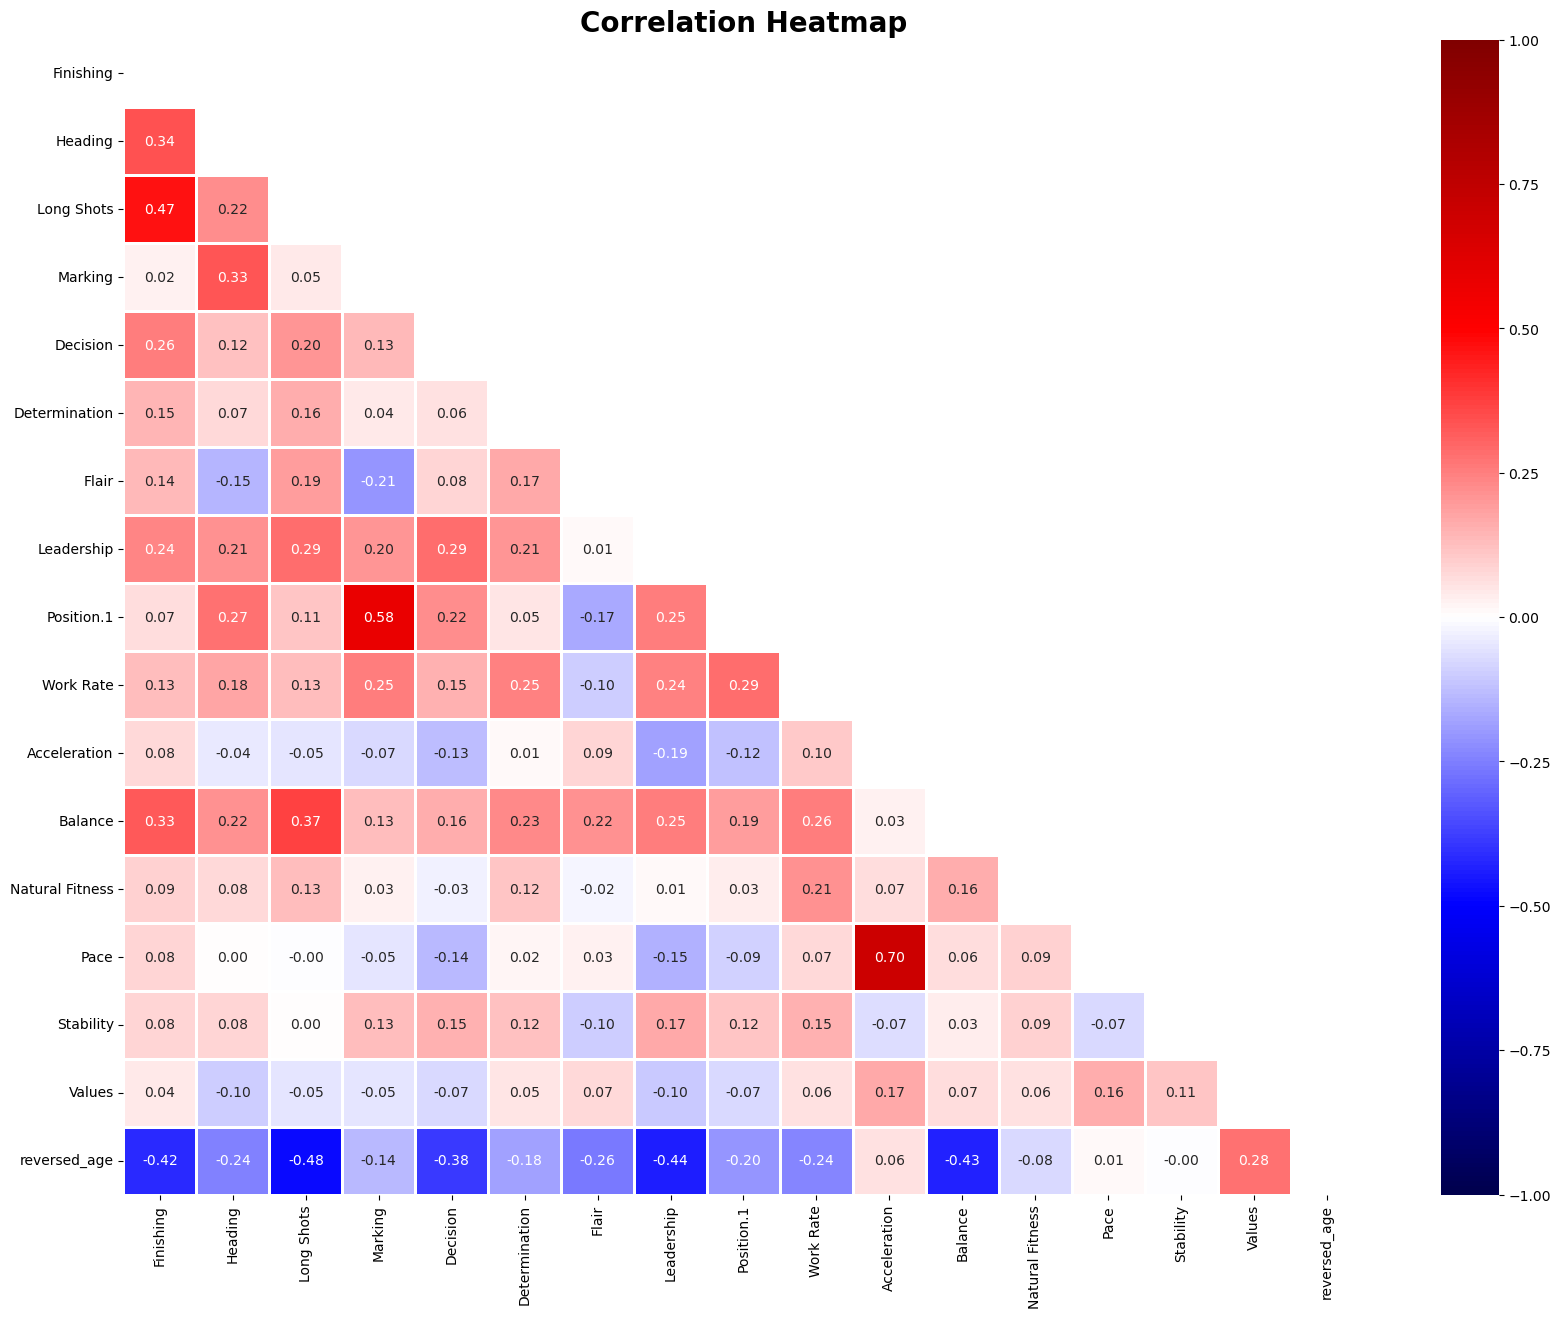

In [56]:

fig = plt.figure(figsize=[20,15])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

Split

Feature Selection

In [57]:
""" 
# Assuming df is your DataFrame
max_age = amr_df['Age'].max()
amr_df['reversed_age'] = max_age - amr_df['Age']
amr_df.drop(columns=['Age'], inplace=True)
 """

" \n# Assuming df is your DataFrame\nmax_age = amr_df['Age'].max()\namr_df['reversed_age'] = max_age - amr_df['Age']\namr_df.drop(columns=['Age'], inplace=True)\n "

In [58]:
#y_log = np.log10(y_train)


In [59]:
X = amr_df2.copy()
values = X.pop("Values")
y = np.log10(values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Selection - Variance

In [64]:
range_var_df = (pd.DataFrame({
                'Range': X_train.max() - X_train.min(),
                'Variance': X_train.var()})
                .sort_values(by='Variance'))

In [65]:
range_var_df.head()

,Range,Variance
Pace,9,1.864027
Acceleration,10,2.268307
Decision,12,3.728536
Finishing,13,3.926877
Flair,12,3.991025


In [66]:
range_var_df.tail()

,Range,Variance
Heading,15,6.308316
Balance,16,6.568631
Determination,18,8.570101
Leadership,17,10.034721
reversed_age,23,26.174702


In [67]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import multiprocessing
import time

param_grid_rf = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5, 10]
}
param_grid_knn = {
    "classifier__n_neighbors": list(range(3, 30)),
    "classifier__weights": ['uniform', 'distance'],
    "classifier__p": [1, 2]
}
param_grid_svm = {
    "classifier__C": [0.1, 1, 10],
    "classifier__epsilon": [0.1, 0.01, 0.001],
    "classifier__kernel": ["linear", "rbf", "poly"]  # You can try different kernels
}

# List of classifiers and their corresponding parameter grids
classifiers = [
    SVR(),
    RandomForestRegressor(),
    KNeighborsRegressor()
]


param_grids = [
     param_grid_svm,
     param_grid_rf,
     param_grid_knn
   
]


best_classifier = None
best_score = float('-inf')  # Initialize with a very low value

# Perform GridSearchCV for each classifier
for classifier, param_grid in zip(classifiers, param_grids):
    start_time = time.time()

    model_pipeline = Pipeline([
        #('branches', branches),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=10)),
        ('classifier', classifier)
    ])

    """ neigh_search = GridSearchCV(
        model_pipeline,
        param_grid,
        cv=5,
        verbose=1,
        n_jobs=multiprocessing.cpu_count() - 1
    ) """
    neigh_search = RandomizedSearchCV(model_pipeline,
                                   param_grid,
                                   n_iter=50,
                                   cv=5,
                                   random_state=123,
                                   n_jobs=multiprocessing.cpu_count() - 1)
    neigh_search.fit(X_train, y_train)

    if neigh_search.best_score_ > best_score:
        best_score = neigh_search.best_score_
        best_classifier = classifier.__class__.__name__

# Print the best classifier and its best score
print(f"Best Classifier: {best_classifier}")
print(f"Best Score: {best_score}")

/Users/rafa/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


/Users/rafa/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Classifier: KNeighborsRegressor
Best Score: 0.11155614001442246


ML

In [68]:
""" from xgboost import XGBRegressor

model_pipeline = make_pipeline(#StandardScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {"xgbregressor__n_estimators": [100, 500, 1000],
              "xgbregressor__max_depth": [3, 5, 7],
              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}

xgb_search = RandomizedSearchCV(model_pipeline,
                                param_grid,
                                scoring="neg_mean_absolute_percentage_error",
                                n_iter=50,
                                cv=5,
                                n_jobs=-1,
                                random_state=123)

xgb_search.fit(X_train, y_train)

best_score_search_xgb = xgb_search.best_score_

print(f"{best_score_search_xgb} MAPE")
 """

' from xgboost import XGBRegressor\n\nmodel_pipeline = make_pipeline(#StandardScaler(), \n                               XGBRegressor(random_state=123))\n#y_scaler = StandardScaler()\n#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()\n\nparam_grid = {"xgbregressor__n_estimators": [100, 500, 1000],\n              "xgbregressor__max_depth": [3, 5, 7],\n              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}\n\nxgb_search = RandomizedSearchCV(model_pipeline,\n                                param_grid,\n                                scoring="neg_mean_absolute_percentage_error",\n                                n_iter=50,\n                                cv=5,\n                                n_jobs=-1,\n                                random_state=123)\n\nxgb_search.fit(X_train, y_train)\n\nbest_score_search_xgb = xgb_search.best_score_\n\nprint(f"{best_score_search_xgb} MAPE")\n '

Metric

In [74]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [75]:
dt_predictions = neigh_search.predict(X_test)

In [76]:
#tree_predict = tree.predict(X_test)

In [79]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [80]:
pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["knn"])

,MAE,RMSE,MAPE,R2
xgboost,0.394937,0.524849,0.06214,0.181657


In [81]:
""" dt_mae = mean_absolute_error(y_true = y_test, y_pred = tree_predict)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = tree_predict, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = tree_predict)
dt_r2 = r2_score(y_true = y_test, y_pred = tree_predict) """

' dt_mae = mean_absolute_error(y_true = y_test, y_pred = tree_predict)\ndt_rmse = mean_squared_error(y_true = y_test, y_pred = tree_predict, squared=False)\ndt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = tree_predict)\ndt_r2 = r2_score(y_true = y_test, y_pred = tree_predict) '

In [82]:
""" pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["tree"]) """

' pd.DataFrame({"MAE": [dt_mae],\n              "RMSE": [dt_rmse],\n              "MAPE": [dt_mape],\n              "R2": [dt_r2]},\n             index=["tree"]) '

In [86]:
#amr_df['predicted_values'] = xgb_search.predict(amr_df.loc[:,cols])


In [87]:
#xgb_search

In [88]:
10**dt_predictions

array([ 2421056.46327808,  4885052.45016338,  3689361.07791236,
        4598114.33444451,  3993464.10045942,  4531015.73958774,
        7472822.88403258,  6551619.65616164,  2042679.41000335,
        7350746.45754037,  6075212.45904944,  1418125.0321935 ,
        3125407.97548954,  2442260.3650444 ,  1966576.31293183,
        2624533.26651578,  2111108.34380995,  4684995.76107307,
        7583157.95261081,  3811894.03415108,  3344271.79809966,
        4302344.50966286,  3744321.14014947,  5007360.56330137,
        2583538.82899788,  4683743.64449426,  4187712.88696599,
        5284199.17978319,  3218912.33995176,  2542475.78505273,
        2614558.63279729,  2718212.86321793,  4626632.28642518,
        2508754.57067739,  6937985.97082585,  5983924.55322374,
        3266912.88149983,  3783653.1711905 ,  5434951.8378361 ,
        4546911.59700584,  1906522.6315203 ,  9582821.91131029,
        4346244.09693324,  4904257.31284227,  6833314.38204951,
       10179951.72477472,  4966079.39563

In [102]:

# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value tree': 10**dt_predictions ,
                           'Actual Market Value': 10**y_test}).sort_values(by='Actual Market Value', ascending=False)

In [103]:
results_df.round(2)

,Predicted Market Value tree,Actual Market Value
30,10166237.47,40829091.0
528,3724449.43,39300000.0
49,10179951.72,38141386.0
559,4908981.20,38045289.0
512,3783653.17,37800000.0
...,...,...
328,4546911.60,163618.0
380,1079648.02,112453.0
239,2111108.34,79623.0
679,3744321.14,72595.0


In [104]:
results_df2 = results_df.merge(amr_df, how='left', left_index=True, right_index=True)


In [105]:
amr_df2

,Finishing,Heading,Long Shots,Marking,Decision,Determination,Flair,Leadership,Position.1,Work Rate,Acceleration,Balance,Natural Fitness,Pace,Stability,Values,reversed_age
0,15,13,17,4,14,13,17,11,4,12,14,18,10,12,13,20000000,13
1,16,6,15,6,15,18,13,13,10,15,14,14,12,13,17,33067483,8
2,11,5,12,6,12,13,19,10,7,11,18,15,16,17,12,29699999,12
3,15,7,13,7,14,9,15,8,8,14,15,15,12,14,14,36552285,11
4,13,7,11,4,16,15,15,6,6,14,13,17,14,14,14,35000000,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,7,7,6,7,12,17,15,7,8,13,10,8,14,10,20,8871048,25
709,9,1,10,1,5,4,18,4,3,9,11,9,14,10,6,9678350,25
710,7,7,7,5,13,14,13,4,5,7,7,6,14,7,10,2977776,24
711,4,4,4,5,12,3,14,2,5,9,12,5,14,12,6,8861769,24


In [106]:
results_df2.round(2).head(50)

,Predicted Market Value tree,Actual Market Value,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
30,10166237.47,40829091.0,Emiliano Buendía,M/AM RC,25,142,160,Aston Villa,14,15,16,11,15,13,5,11,4,4,15,9,7,16,15,14,12,16,11,16,11,16,18,5,15,8,12,14,14,16,15,8,14,14,13,10,12,14,14,6,14,2,2,1,2,2,1,2,3,3,1,1,15,16,12,14,13,13,5,3,1,1,1,1,1,1,1,1,1,18,10,20,20,1,170,65,10,20,40829091,67201783,AMC
528,3724449.43,39300000.0,Lovro Zvonarek,M/AM RLC,17,105,-8,FC Bayern München,12,10,12,11,13,12,6,11,4,9,12,11,11,13,12,11,12,12,10,13,10,13,13,13,12,11,12,12,12,12,11,8,14,12,12,8,12,7,12,6,15,3,2,1,1,2,2,1,1,1,2,1,12,16,4,12,15,16,13,12,1,1,1,1,1,1,10,12,18,12,15,20,15,11,180,68,9,20,39300000,2000097325,AMC
49,10179951.72,38141386.0,Ryan Christie,M/AM RLC,27,139,150,AFC Bournemouth,11,12,14,13,14,12,5,14,1,5,13,11,7,15,10,15,7,13,11,16,13,12,16,8,16,9,12,15,14,14,13,9,15,14,14,11,15,6,14,6,10,2,4,3,2,2,1,1,3,3,4,1,10,14,8,14,10,14,14,13,1,1,1,1,1,1,1,15,16,15,16,20,20,9,178,74,20,10,38141386,61042900,AMC
559,4908981.20,38045289.0,Wanya Marçal-Madivádua,M/AM LC,19,100,-75,Leicester City,10,11,12,10,12,10,8,12,8,10,12,7,8,12,9,10,10,11,12,11,9,5,15,8,10,9,12,13,12,6,12,8,8,14,13,10,20,11,6,13,9,4,3,3,3,1,3,3,1,3,2,1,10,11,2,11,13,13,9,16,1,1,1,1,14,10,1,15,18,1,15,20,14,1,181,76,12,20,38045289,28127132,AMC
512,3783653.17,37800000.0,Fedde de Jong,M/AM RLC,19,107,-75,AZ Alkmaar,4,5,8,9,11,10,8,12,4,7,12,6,7,12,9,12,10,13,12,12,13,14,9,13,13,10,14,14,12,12,12,11,12,13,12,10,13,5,10,4,5,3,3,2,1,3,2,2,1,2,2,1,12,12,7,13,14,7,12,16,1,1,1,1,1,1,1,14,18,14,17,20,16,1,185,72,10,20,37800000,37084339,AMC
586,5007360.56,36954967.0,James Balagizi,M/AM LC,18,97,-75,Liverpool,8,11,13,9,13,10,11,8,8,7,13,9,7,14,11,10,8,12,8,12,9,11,12,7,12,7,8,11,13,12,11,9,12,12,10,11,11,9,11,9,13,2,3,1,2,1,2,2,2,2,2,1,12,13,10,10,11,11,10,11,1,1,1,1,1,1,14,1,18,1,19,20,14,13,186,0,8,20,36954967,2000049211,AMC
6,10383073.31,34748999.0,Pedro Gonçalves,M/AM RLC,24,153,161,Sporting Clube de Portugal,11,12,15,17,15,14,8,14,10,6,14,8,9,16,11,16,9,15,12,15,14,14,14,8,15,10,11,13,15,16,14,8,13,15,14,9,13,12,12,8,10,2,4,3,3,3,3,1,3,2,2,1,17,12,6,13,16,15,14,13,1,1,1,1,1,1,1,12,18,10,18,20,16,14,174,67,12,20,34748999,29192705,AMC
31,8093152.68,33817504.0,Mohammed Kudus,M/AM/S C,21,142,160,AFC Ajax,12,10,15,13,14,11,7,10,11,7,14,14,6,16,15,14,13,13,11,12,10,13,13,6,13,7,12,12,16,15,14,8,14,14,13,14,10,5,8,9,13,2,1,2,3,3,1,3,2,4,1,1,16,11,12,12,10,13,13,14,1,1,1,1,1,1,13,12,18,12,12,20,12,17,177,70,20,12,33817504,13200568,AMC
530,7276487.03,32199999.0,Laurin Ulrich,M/AM RLC,17,105,-8,VfB Stuttgart,10,11,14,11,13,12,7,11,2,6,13,12,7,14,8,8,9,10,8,13,8,13,16,7,11,7,11,10,12,12,10,8,13,12,11,9,12,5,12,6,13,3,1,2,3,3,2,3,3,2,2,2,7,17,6,14,12,16,12,16,1,1,1,1,1,1,12,16,18,10,18,20,16,10,180,75,15,20,32199999,2001040995,AMC
525,3640558.87,30359999.0,Antonio Foti,M/AM RLC,18,106,-75,Eintracht Frankfurt,11,11,12,12,13,11,8,12,3,8,13,13,9,14,12,11,9,12,9,13,9,14,14,10,13,8,12,10,12,11,11,9,14,12,11,9,13,5,12,5,15,1,3,2,2,3,2,3,2,3,3,3,12,14,6,9,11,11,12,13,1,1,1,1,1,1,10,12,18,12,15,20,15,14,180,74,12,20,30359999,2000057844,AMC


In [95]:
results_df

,Predicted Market Value tree,Actual Market Value
694,4.871624e+06,72000.0
679,3.744321e+06,72595.0
239,2.111108e+06,79623.0
380,1.079648e+06,112453.0
328,4.546912e+06,163618.0
...,...,...
512,3.783653e+06,37800000.0
559,4.908981e+06,38045289.0
49,1.017995e+07,38141386.0
528,3.724449e+06,39300000.0


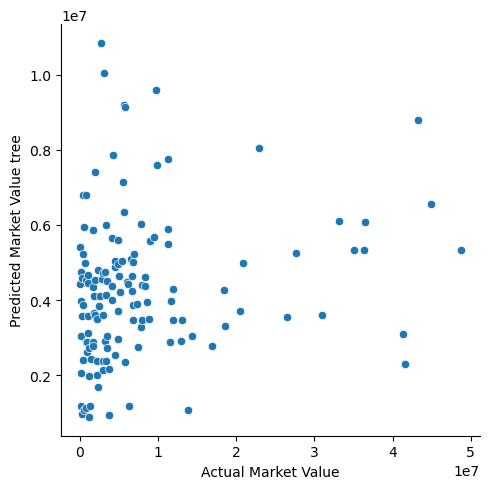

In [ ]:
sns.relplot(data=results_df,x='Actual Market Value',y='Predicted Market Value tree')